#Lab 6  Questions

$\color{red}{\text{RULES:}}$

1) Work individually! 

2) You can use the lecture notes (that are posted on D2L), and other materials (e.g. books, web searches).

###Question 1  

**Download Data**  
In order to complete this lab you need 2 data files to be downloaded from different web sites:
1. Download Better Life Index data from OECD's website.  
   a) Make sure that you export the data file as CSV (comma separated values): https://stats.oecd.org/index.aspx?DataSetCode=BLI  
   b) Rename the file as `oecd_bli_2022.csv`
2. Download GDP Per Capita database from IMF's web site: https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD  
  a) The data can be downloaded in Excel file format. After the download, open it in Excel and rename the first column as `Country`  
  b) Save the file as a CSV file
  c) Rename the csv file as `gdp_per_capita.csv`
3. Upload the two csv files to Google Colab's /content folder. **Note:** every time you close your Colab file the data files will be cleaned up from the content folder. You will need to keep the csv files in your local file system to upload them again if you need.  
**Hint** You can use the two data files provided in the D2L Lab's Dataset section. However, you are strongly advised to download the data from the web sites and process it yourself (following the instructions given above) to be able to understand a real life project.

**Load Data**  
You need to load the data to Pandas dataframes:  
* You can use Pandas' `read_csv()` function to read the data and load it to a dataframe

In [ ]:
import pandas as pd

oecd_bli = pd.read_csv("/content/oecd_bli_2022.csv", thousands=',')
gdp_per_capita = pd.read_csv("/content/gdp_per_capita.csv",thousands=',', na_values="n/a")

**View Data**  
View the data loaded by using the `head()` function for both datasets

In [ ]:
oecd_bli.head()

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.4,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.5,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.7,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.0,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.1,NaN,NaN


In [ ]:
gdp_per_capita.head()
gdp_per_capita.columns

Index(['Country', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
       '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
       '1996', '1997', '1998', '1999', '2000', '2001', '2002', '2003', '2004',
       '2005', '2006', '2007', '2008', '2009', '2010', '2011', '2012', '2013',
       '2014', '2015', '2016', '2017', '2018', '2019', '2020', '2021', '2022',
       '2023', '2024', '2025', '2026'],
      dtype='object')

The following function will merge the two datasets into a country_stats dataframe. Read the code to understand how it works, then run it

In [ ]:
def prepare_country_stats(oecd_bli, gdp_per_capita):
    oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
    oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")
    gdp_per_capita.rename(columns={"2021": "GDP per capita"}, inplace=True)
    gdp_per_capita.set_index("Country", inplace=True)
    full_country_stats = pd.merge(left=oecd_bli, right=gdp_per_capita,
                                  left_index=True, right_index=True)
    full_country_stats["GDP per capita"] = full_country_stats["GDP per capita"].astype(float)
    full_country_stats.sort_values(by="GDP per capita", inplace=True)
    remove_indices = [0, 1, 6, 8, 33, 34, 35]
    keep_indices = list(set(range(36)) - set(remove_indices))
    return full_country_stats[["GDP per capita", 'Life satisfaction']].iloc[keep_indices]


country_stats = prepare_country_stats(oecd_bli, gdp_per_capita).sort_values("GDP per capita")




**View Country Stats**  
View the contents of `country_stats` data frame

In [ ]:
country_stats

,GDP per capita,Life satisfaction
Country,,
Brazil,7741.153,6.4
Turkey,9406.575,5.5
Mexico,9967.388,6.5
Chile,16799.367,6.5
Hungary,18527.592,5.6
Greece,19827.162,5.4
Slovak Republic,21383.286,6.2
Lithuania,22411.646,5.9
Portugal,24457.144,5.4


**Visualize Data**  
Display the Country Statistics as a scatter plot with the following axis:  
* x axis --> GDP per Capita
* y axis --> Life Satisfaction 

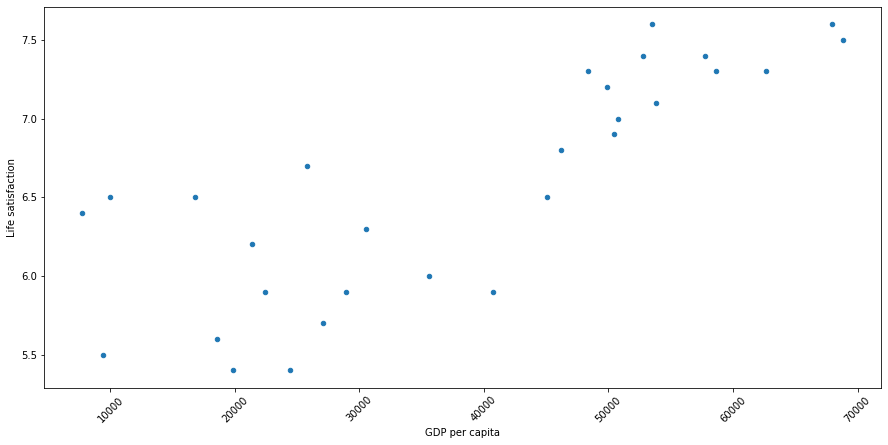

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X = np.c_[country_stats["GDP per capita"]]
y = np.c_[country_stats["Life satisfaction"]]

country_stats.plot.scatter(x="GDP per capita", y='Life satisfaction', figsize=(15,7) )
plt.xticks(rotation=45)
plt.show()


**Train a Linear Model**  
Train a Linear Regression model to learn from data and to be able to predict Life Satisfaction from a given GDP per Capita:
* Training the model using Linear Regression
* Making a Prediction for "Nauru" with GDP per Capita = 10138  

**Note:** Read the code below. You don't need to understand how it works for now.

In [ ]:
import sklearn.linear_model

# Select a linear model
model = sklearn.linear_model.LinearRegression()

# Train the model
model.fit(X, y)

# Make a prediction for Nauru
X_new = [[10138]] # Naurus's GDP per capita

print(model.predict(X_new)) # outputs [[ 5.69486151]]

[[5.69486151]]


**Train a k-Nearest Neighbors Model**  
Train using a k-Nearest Neihbors regression model to learn from data and to be able to predict Life Satisfaction from a given GDP per Capita:
* Training the model using k-Nearest Neighbors
* Making a Prediction for "Nauru" with GDP per Capita = 10138  

**Note:** Read the code below. You don't need to understand how it works for now. Notice the similarities with the above model.

In [ ]:
import sklearn.neighbors

# Select KNeighborsRegressor model using 3 neighbors
model = sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)

# Train the model
model.fit(X, y)

# Make a prediction for Nauru
X_new = [[10138]] # Naurus's GDP per capita

print(model.predict(X_new)) # outputs [[ 6.13333333]]

[[6.13333333]]
